In [1]:
import numpy as np 
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
from ipynb.fs.full.Quantile_Normalization import quantile_norm, quantile_norm_log

# Import TCGA melanoma data 
## Rna read data
file='../data/counts.txt'
with open(file, 'rt') as f: 
    read_counts=pd.read_csv(f,index_col=0) 
    
counts=read_counts.values

In [2]:
log_counts_normalized=quantile_norm_log(counts)

In [3]:
def most_variable_rows(data,*,n=1500):
    """
    
    Subset n most variable genes
    
    Parameters
    ..........
    
    data: 2D array of float
    n: int, optional 
        Number of rows to return. 
    
    Return
    ..........
    variable_data=2D array of float 
    
    """
    
    # compute accorss columns
    
    rowvar=np.var(data,axis=1)
    # get indices
    
    sort_indices=np.argsort(rowvar)[-n:]
    
    variable_data=data[sort_indices,:]
    
    return variable_data



In [4]:
from scipy.cluster.hierarchy import linkage

def bicluster(data, linkage_method='average',distance_metric='correlation'):
    """
    
    Subset n most variable genes
    
    Parameters
    ..........
    
    data: 2D array of float
        the input data to bicluster
    linkage_method: string, optional 
        method to be passed linkage 
    distance_metric:
        distance metric for clustering 
    
    Returns
    ..........
        
    y_rows: linkage_matrix
        The clustering of the rows of the input data 
    y_cols:linkage matrix 
        The clustering of the cols of the input data

    """
    y_rows=linkage(data,method=linkage_method,metric=distance_metric)
    y_cols=linkage(data.T,method=linkage_method,metric=distance_metric)
    return y_rows,y_cols


In [5]:
from scipy.cluster.hierarchy import dendrogram, leaves_list

def clear_spines(axes):
    for loc in ['left','right','top','bottom']:
        axes.spines[loc].set_visible(False)
    axes.set_xticks([])
    axes.set_yticks([])

def plot_bicluster(data,row_linkage,col_linkage,row_nclusters=10,col_nclusters=3):
    """
    
    Perform a biclusetring, plot a heatmap with dendrograms on each axis
    
    
    Parameters 
    ..........
    
    data: 2D array of float shape (m,n)
    row_linkage:array, shape (m-1,4)
        linkage matrix for rows of data
    col_linkage: array shape (n-1,4)
        the linakge matrix for the columns of 'data'
    n_clusters, n_clusters_c: int, optional
        number of clusters for rows and colums
    
    Returns 
    ..........
    
    Xn: 2D array of float shape (m,n)
        data normalized
    
    """
    
    fig=plt.figure(figsize=(15,15))
    
    ## compute row-wsie dendrogram
    
    ax1=fig.add_axes([0.09,0.1,0.2,0.6])
    
    threshold_r=(row_linkage[-row_nclusters,2] + row_linkage[-row_nclusters + 1,2])/2
    with plt.rc_context({'lines.linewidth':0.75}):
        dendrogram(row_linkage,orientation='left',color_threshold=threshold_r,ax=ax1)
        
    clear_spines(ax1)
    
    ax2=fig.add_axes([0.3,0.71,0.6,0.2])
    
    threshold_c=(col_linkage[-col_nclusters,2] + col_linkage[-col_nclusters + 1,2])/2
    
    with plt.rc_context({'lines.linewidth':0.75}):
        dendrogram(col_linkage,color_threshold=threshold_c,ax=ax2)
        
    clear_spines(ax2)
    
    ax=fig.add_axes([0.3,0.1,0.6,0.6])
    
    idx_rows=leaves_list(row_linkage)
    data=data[idx_rows,:]
    idx_cols=leaves_list(col_linkage)
    data=data[:,idx_cols]
    
    im=ax.imshow(data,aspect='auto',origin='lower',cmap='YlGnBu_r')
    clear_spines(ax)
    
    ax.set_xlabel('Samples')
    ax.set_ylabel('Genes',labelpad=125)
    
    axcolor=fig.add_axes([.9,.1,.02, .6])
    plt.colorbar(im,cax=axcolor)
    
    plt.show()

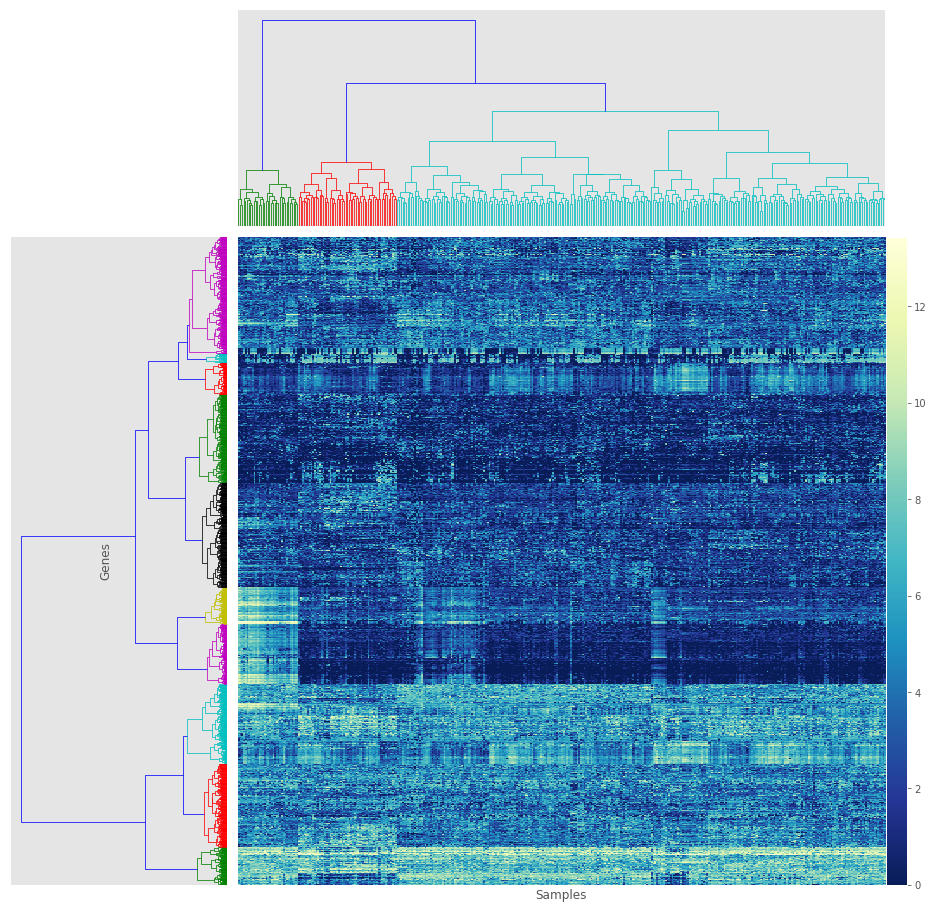

In [6]:
counts_log=log_counts_normalized
counts_var=most_variable_rows(counts_log,n=1500)
yr,yc=bicluster(counts_var,linkage_method='ward',distance_metric='euclidean')
with plt.style.context('ggplot'):
    plot_bicluster(counts_var,yr,yc)

In [7]:
patients=pd.read_csv('../data/patients.csv',index_col=0)
patients

,UV-signature,original-clusters,melanoma-survival-time,melanoma-dead
TCGA-BF-A1PU,UV signature,keratin,NaN,NaN
TCGA-BF-A1PV,UV signature,keratin,13.0,0.0
TCGA-BF-A1PX,UV signature,keratin,NaN,NaN
TCGA-BF-A1PZ,UV signature,keratin,NaN,NaN
TCGA-BF-A1Q0,not UV,immune,17.0,0.0
TCGA-BF-A3DJ,UV signature,keratin,NaN,NaN
TCGA-BF-A3DL,UV signature,keratin,NaN,NaN
TCGA-BF-A3DM,UV signature,MITF-low,NaN,NaN
TCGA-BF-A3DN,UV signature,MITF-low,NaN,NaN
TCGA-BF-A5EO,UV signature,keratin,NaN,NaN


In [8]:
def survival_distribution_function(lifetimes,right_censored=None):
    """
    Return the survival distribution- the proportion of people who survive- of a set of lifetimes. 
    
    Parameters 
    
    ..........
    
    lifetimes:array of float or int
        the observed lifetimes of a population 
    right_censored: array of bool
        same length as lifetimes, indicates that this lifetimes was not observed
        
    Returns
    
    ..........
    
    sorted_lifetimes: array of float 
    sdf:array of float
        values starting at 1 progressively decrementing one level per observation in lifetimes
        
    In this example , of a population of four, two die at time 1, a thrid at time 2 , and a final at an unknown time
    
    
    
    
    """
    
    n_obs=len(lifetimes)
    rc=np.isnan(lifetimes)
    if right_censored is not None:
        rc |= right_censored
    observed=lifetimes[~rc]
    xs=np.concatenate(([0],np.sort(observed)))
    ys=np.linspace(1,0,n_obs +1 )
    ys=ys[:len(xs)]
    return xs, ys

In [9]:
def plot_cluster_survival_curve(clusters,sample_names,patients,censor=True):
    """
    Plot the survival data from a set of sample clusters
    
    Parameters 
    
    ..........
    
    clusters: array of int or categorical pd.Series
        the cluster identity of ecach sample, encoded as a simple int or pandas categorical variable
    sample_names: list of string
        the name corresponding to each sample, must be the same length as clusters
    patients: pandas.DataFrame :
        containing survival infromation for each pateitn, indices must correspond to sample names
    censor: bool, optional 
        If True use 'patients[melanonma-dead]' to right-censor the survival data 
    
    """
        
    fig,ax=plt.subplots()
    if type(clusters)==np.ndarray:
        cluster_ids=np.unique(clusters)
        cluster_names=['cluster {}'.format(i) for i in cluster_ids]
    elif type(clusters)==pd.Series:
        cluster_ids=clusters.cat.categories
        cluster_names=list(cluster_ids)
    n_clusters=len(clusters)
    for c in cluster_ids:
        clust_samples=np.flatnonzero(clusters==c)
        ## discard patient not present in survival
        clust_samples=[sample_names[i] for i in clust_samples if sample_names[i] in patients.index]
        patient_cluster=patients.loc[clust_samples]
        survival_times=patient_cluster['melanoma-survival-time'].values
        if censor:
            censored=~patient_cluster['melanoma-dead'].values.astype(bool)
        else:
            censored=None
        stimes,sfracs=survival_distribution_function(survival_times,censored)
        ax.plot(stimes/365,sfracs)
    ax.set_xlabel('survival time (years)')
    ax.set_ylabel('fraction alive')
    ax.legend(cluster_names)

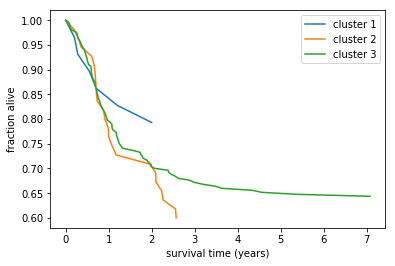

In [10]:
from scipy.cluster.hierarchy import fcluster

n_clusters=3
threshold_distance=(yc[-n_clusters,2]+yc[-n_clusters,2]) /2
clusters=fcluster(yc, threshold_distance,'distance')
plot_cluster_survival_curve(clusters,read_counts.columns,patients)